In [117]:
from pathlib import Path

root = Path("data")
children = list(root.iterdir())
course_dirs = list(
    filter(
        lambda x: x.is_dir() and x.name not in [".git", ".DS_Store"],
        children,
    )
)
course_names = list(map(lambda x: x.name, course_dirs))
course_names

['eecs70',
 'cs61a',
 'cs184',
 'cs186',
 'data102',
 'data100',
 'eecs16b',
 'eecs120',
 'cs162',
 'data8',
 'cs61b',
 'cs189',
 'cs170',
 'eecs105',
 'cs61c',
 'eecs152',
 'cs188',
 'cs164',
 'cs169',
 'data101',
 'cs150',
 'cs161',
 'cs174',
 'cs172',
 'eecs16a',
 'cs88']

In [23]:
# %pip install 'unstructured'
# %pip install 'unstructured[pdf]'

In [24]:
import unstructured.partition.pdf as pdf


In [25]:
import inspect 
print(inspect.signature(pdf.partition_pdf))

(filename: str = '', file: Union[BinaryIO, tempfile.SpooledTemporaryFile, NoneType] = None, include_page_breaks: bool = False, strategy: str = 'auto', infer_table_structure: bool = False, ocr_languages: Optional[str] = None, languages: Optional[List[str]] = None, include_metadata: bool = True, metadata_filename: Optional[str] = None, metadata_last_modified: Optional[str] = None, chunking_strategy: Optional[str] = None, links: Sequence[unstructured.documents.elements.Link] = [], extract_images_in_pdf: bool = False, image_output_dir_path: Optional[str] = None, **kwargs) -> List[unstructured.documents.elements.Element]


In [26]:
import os 

full_dir_path = "/home/reaganjlee/Berkeley-CS-QA-Dataset/data/cs189"
base_name = "test"
file_path = "renamed_exams/cs189_fall2015_final_solution.pdf"

# Probably not that helpful as file structure gets more complex
def get_file_name(ending="", base_name=base_name):
    return f"{base_name}{ending}"

def get_full_path(file_path=file_path, full_dir_path=full_dir_path):
    return os.path.join(full_dir_path, file_path)

print(get_full_path())
print(get_full_path(""))


/home/reaganjlee/Berkeley-CS-QA-Dataset/data/cs189/renamed_exams/cs189_fall2015_final_solution.pdf
/home/reaganjlee/Berkeley-CS-QA-Dataset/data/cs189/


In [27]:
from datetime import datetime

def generate_folder_name(dataset_name):
    """
    Generates a folder name with the format: [DatasetName]_[YYYYMMDD]_[HHMMSS]

    :param dataset_name: The name of the dataset
    :return: A string representing the folder name
    """
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    folder_name = f"{dataset_name}_{timestamp}"
    return folder_name

# Example usage
folder_name_example = generate_folder_name("ExampleDataset")
print(folder_name_example)


ExampleDataset_20231222_150151


In [28]:
def func():
    folder_path = get_full_path()
    dataset_name = "cs189_fall2015_final_solution"
    
    if not os.path.exists(folder_path) and os.path.isdir(folder_path):
        os.makedirs(partitions_path)

    


In [16]:
partitioned_elements = pdf.partition_pdf(
    get_file_name(".pdf", "test"),
    include_page_breaks=True,
    strategy="hi_res",
    infer_table_structure=True,
    extract_images_in_pdf=True,
    output_type="dict",
    image_output_dir_path="testpdf_images",
)

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [17]:
len(partitioned_elements)

230

In [18]:
partitioned_elements[:5]

In [19]:
partitioned_elements[1].metadata.coordinates.points

((1260.1981201171875, 169.6866455078125),
 (1260.1981201171875, 252.9463277777776),
 (1523.743408203125, 252.9463277777776),
 (1523.743408203125, 169.6866455078125))

In [20]:
print(type(partitioned_elements))
print(partitioned_elements[10])
print(type(partitioned_elements[10]))

<class 'list'>
• For multiple answer questions, ﬁll in the bubbles for ALL correct choices: there may be more than one correct choice, but there is always at least one correct choice. NO partial credit on multiple answer questions: the set of all correct answers must be checked.
<class 'unstructured.documents.elements.ListItem'>


In [21]:
for i in range(10, 25):
    print(partitioned_elements[i])
    print()

• For multiple answer questions, ﬁll in the bubbles for ALL correct choices: there may be more than one correct choice, but there is always at least one correct choice. NO partial credit on multiple answer questions: the set of all correct answers must be checked.

First name Last name SID First and last name of student to your left First and last name of student to your right

1



Q1. [60 pts] Multiple Answer

Fill in the bubbles for ALL correct choices: there may be more than one correct choice, but there is always at least one correct choice. NO partial credit: the set of all correct answers must be checked.

1+exp θ ) for some θ ∈ R. What is the MLE estimator of θ? 1 (a) [3 pts] Let X ∼ Bernoulli(

(cid:13) X (cid:13) 0 (cid:13) 1

(cid:13) Does not exist.

(b) [3 pts] Let Y ∼ N(Xθ, In) for some unknown θ ∈ Rd and some known X ∈ Rn×d that has full column rank and d < n. What is the MLE estimator of θ?

(cid:13) Y + Z ∀Z ∈ Null(X)

(cid:13) (X(cid:62)X)−1X(cid:62)Y (cid:13) X(cid:6

### Get Image from coordinates 


In [29]:
element = partitioned_elements[1]
print(element.metadata.coordinates.to_dict())
print(element.metadata.coordinates.system)
print(element.metadata.coordinates.system.orientation)
print(element.metadata.coordinates.system.width)
print(element.metadata.coordinates.system.height)


{'points': ((1260.1981201171875, 169.6866455078125), (1260.1981201171875, 252.9463277777776), (1523.743408203125, 252.9463277777776), (1523.743408203125, 169.6866455078125)), 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}
Orientation.SCREEN
1700
2200


In [30]:
import fitz  # PyMuPDF

def convert_pdf_to_jpg_with_quad(element, pdf_path, output_path, debug=False):
    """
    Convert a PDF to JPG after cropping with given quadrilateral points, scaling them to fit the PDF page dimensions.
    :param pdf_path: Path to the PDF file.
    :param quad_points: A list of 4 tuples, each representing the corners of the quadrilateral.
    :param output_path: Path to save the output JPG file.
    :param pixel_sys_width: Width of the original pixel-based system.
    :param pixel_sys_height: Height of the original pixel-based system.
    """
    quad_points = element.metadata.coordinates.points
    pixel_sys_width = element.metadata.coordinates.system.width
    pixel_sys_height = element.metadata.coordinates.system.height
    pdf_page_num = element.metadata.page_number


    doc = fitz.open(pdf_path)
    page = doc.load_page(pdf_page_num-1)
    
    # Get the dimensions of the PDF page in points
    pdf_width, pdf_height = page.rect.width, page.rect.height
    if debug:
        print("beginning page cropbox: ", page.cropbox)
        print(f"pdf_width: {pdf_width}")
        print(f"pdf_height: {pdf_height}")

    # Calculate scaling factors
    scale_x = pdf_width / pixel_sys_width 
    scale_y = pdf_height / pixel_sys_height

    # Transform and scale the coordinates
    transformed_quad_points = []
    for x, y in quad_points:
        x_scaled = x * scale_x
        y_scaled = y * scale_y

        # Consider leaving this to raise if out of bounds 
        x_scaled = min(max(x_scaled, 0), pdf_width)
        y_scaled = min(max(y_scaled, 0), pdf_height)

        transformed_quad_points.append((x_scaled, y_scaled))


    # Convert quadrilateral into a rectangle for cropping (minimal bounding box)
    rect = fitz.Rect(fitz.Point(*transformed_quad_points[0]), fitz.Point(*transformed_quad_points[2]))

    if debug:
        print("original quad_points", quad_points)
        print("transformed_quad_points", transformed_quad_points)
        print("pdf dimensions", pdf_width, pdf_height)
        print("after page cropbox: ", page.cropbox)
        print("after page mediabox: ", page.mediabox)
        print("rect is: ", rect)

    # Crop the page
    page.set_cropbox(rect)

    zoom_x = 2.0  # horizontal zoom
    zoom_y = 2.0  # vertical zoom
    mat = fitz.Matrix(zoom_x, zoom_y)  # zoom factor 2 in each dimension
    pix = page.get_pixmap(matrix=mat)  # use 'mat' instead of the identity matrix

    # Save the image as JPG
    pix.save(output_path)

    # Close the document
    doc.close()
    return pix

# Example usage
element = partitioned_elements[150]
pdf_path = get_file_name(".pdf")
output_path = f'{get_file_name()}_output.jpg'

convert_pdf_to_jpg_with_quad(element, pdf_path, output_path)

Pixmap(DeviceRGB, IRect(0, 0, 646, 50), 0)

In [31]:
partitioned_elements[200].metadata.page_number


14

### Image to Latex

In [32]:
from PIL import Image
from pix2tex.cli import LatexOCR

In [33]:
import pix2tex.api.app
import asyncio
pix2tex.api.app.root()

{'message': 'OK', 'status-code': <HTTPStatus.OK: 200>, 'data': {}}

In [39]:
!ls

data		      LICENSE	       test.pdf
generate_latex.ipynb  README.md        testpdf_images
generate_latex.py     test_output.jpg  webdata_extraction_scripts


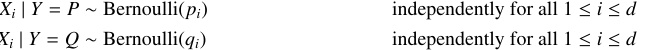

\begin{array}{c}{{X_{i}\mid Y=P\sim\mathrm{{{Bernoulli}}}(p_{i})\qquad\qquad\mathrm{independently~for~all~1\leqi\leqd~}}}\\ {{\chi_{i}\mid Y=Q\sim\mathrm{{Bernoulli}}(q_{i})\qquad\qquad\mathrm{independently~fotall~1\leqi\leqi\leqd~}}}\end{array}


In [41]:
from PIL import Image
from pix2tex.cli import LatexOCR

img = Image.open('test_output.jpg')
display(img)
model = LatexOCR()
result = model(img)
print(result)

In [42]:


# img = Path("test_output.png") # Image.open('test_output.png').convert('RGB')
# # model = LatexOCR()
# # print(model(img))
# display(img)
# result = pix2tex.api.app.predict(img)

# display(result)
# print(type(result))
# # print(asyncio.run(result))
# await result

## Combine together

In [43]:
element = partitioned_elements[151]
element

In [81]:
element_num = 151
element = partitioned_elements[element_num]
pdf_path = get_file_name(".pdf")
output_path = f'{get_file_name()}_{element_num}_output.jpg'
print(output_path)

convert_pdf_to_jpg_with_quad(element, pdf_path, output_path)

test_151_output.jpg


Pixmap(DeviceRGB, IRect(0, 0, 996, 70), 0)

In [82]:
# from PIL import Image
# from pix2tex.cli import LatexOCR

In [83]:
# img

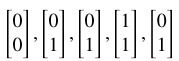

{\binom{0}{0}},{\binom{0}{1}},{\binom{0}{1}},{\binom{1}{1}},{\binom{0}{1}}


In [85]:

# img = Image.frombytes("RBG", [pix.width, pix.height], pix.samples)
img = Image.open('test_152_output.jpg')
display(img)
model = LatexOCR()
result = model(img)
print(result)

In [113]:
from IPython.display import display, Latex
result = "{\\binom{0}{0}},{\\binom{0}{1}},{\\binom{0}{1}},{\\binom{1}{1}},{\\binom{0}{1}}"
result2 = "\hat{p}_{1}^{\mathrm{M,E}}=\mathrm{~\qquad~}\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\hat{p}_{2}^{\mathrm{M,E}}="
# try:
print(result)
dis = display(Latex(f'${result}$'))
dis2 = display(Latex(f'${result2}$'))
# display(type(Latex(f'${result2}$')))
# except Exception as e:
#     print("An error occurred:", type(e).__name__, e)
# except Parse as e:
#     print("Error in LaTeX compilation:")
#     print(e)

{\binom{0}{0}},{\binom{0}{1}},{\binom{0}{1}},{\binom{1}{1}},{\binom{0}{1}}


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [114]:
# display(dis)
dis = Latex(f'${result}$')
# print(dis.)
dis

<IPython.core.display.Latex object>

# Loop it 